In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [3]:
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

### Drill: Four different plots on one variable. 

Distribution plot.

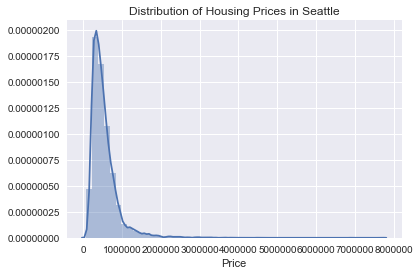

In [4]:
ax = sns.distplot(df['price'])
plt.title('Distribution of Housing Prices in Seattle')
ax.set(xlabel='Price', ylabel='')

plt.show()

This is kind of interesting to see the distribution of housing prices. It is heavily skewed right with just a handful of extremely expensive houses.

QQ Plot:

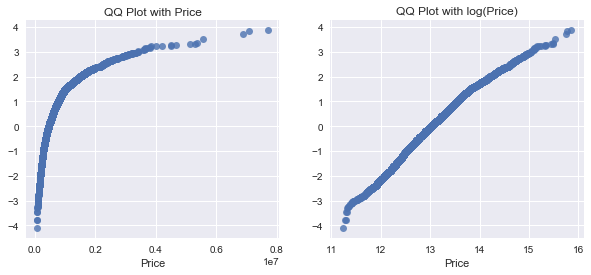

In [5]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
norm = np.random.normal(0, 1, len(df['price']))
norm.sort()

ax1 = sns.regplot(df['price'].sort_values(), norm, fit_reg=False)
ax1.set(xlabel='Price', ylabel='')
plt.title('QQ Plot with Price')

plt.subplot(1,2,2)

ax2 = sns.regplot(np.log(df['price']).sort_values(), norm, fit_reg=False)
ax2.set(xlabel='Price', ylabel='')
plt.title('QQ Plot with log(Price)')

plt.show()

It's clear that the data is not normal, but the QQ Plot shows that concretely. Interestingly, it actually appears to be close to log-normal instead.

Categorical Scatter Plot:
This dataset has way too many points to visualize effectively with stripplot. Not a good choice.

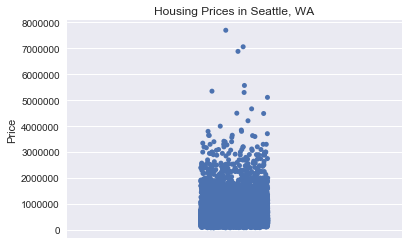

In [6]:
ax = sns.stripplot(y='price', data=df, jitter=True)
ax.set(ylabel='Price')
plt.title('Housing Prices in Seattle, WA')

plt.show()

Box Plot. This is a good one, but there are so many outliers that it's a bit difficult to read.

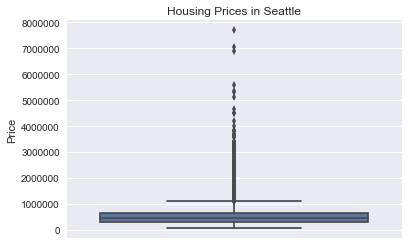

In [7]:
ax = sns.boxplot(y='price', data=df)
ax.set(ylabel='Price')
plt.title('Housing Prices in Seattle')

plt.show()

Violin Plot is like a Box Plot, but shows the shape of the distribution a little better. 

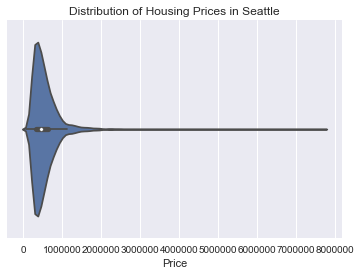

In [8]:
ax = sns.violinplot(x='price', data=df)
ax.set(xlabel='Price')
plt.title('Distribution of Housing Prices in Seattle')

plt.show()

## Drill: Choose three plots with two variables.

Scatter Plot: This works pretty well, but would do better on a smaller dataset. It's pretty messy with so many points. I made them smaller to help a bit with that.

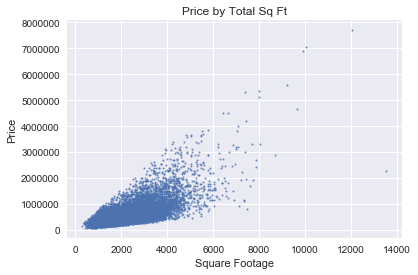

In [9]:
ax = sns.regplot(x='sqft_living', y='price', data=df, fit_reg=False, scatter_kws={"s": 4})
ax.set(xlabel='Square Footage', ylabel='Price')
plt.title('Price by Total Sq Ft')

plt.show()

Joint Plot: Like a scatter plot, but with distribution shapes included for both variables. Kind of cool, and maybe useful because the data set is so large. The attributes are a little bit different to set on this kind of plot.

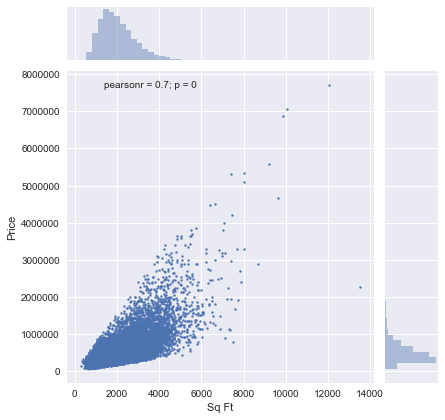

In [10]:
ax = sns.jointplot(x='sqft_living', y='price', data=df, s=4).set_axis_labels("Sq Ft", "Price")

plt.show()

Here is lmplot, which is like regplot, but keeps the axis ticks square (is there another difference?). I've left in the regression line for a little variety.

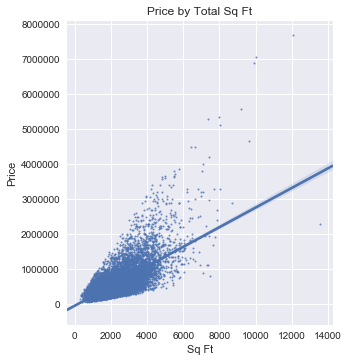

In [11]:
ax = sns.lmplot(x='sqft_living', y='price', data=df, scatter_kws={"s": 4}).set_axis_labels('Sq Ft', 'Price')
plt.title('Price by Total Sq Ft')

plt.show()

## Drill: One continuous and one categorical variable six ways.


Let's compare the 98112 Zip Code (Madison Park, wealthy) to the 98118 Zip Code (Columbia City, less wealthy).

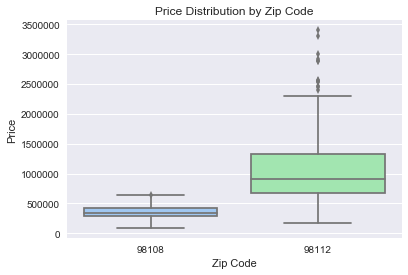

In [12]:
ax = sns.boxplot(x='zipcode', y='price', data=df, order=[98108, 98112], palette='pastel')
ax.set(xlabel='Zip Code', ylabel='Price')
plt.title('Price Distribution by Zip Code')

plt.show()

Wow! That's a great way to visualize the difference between the two neighborhoods. It's clear how different they are, without being cluttered. This is the graph I would use to present this data.

Below includes # of Floors, and is a too busy, but I thought it was cool. I was using the 'order=[]' as a work around above, but I figured out a better way (I think) to display only certain zip codes.

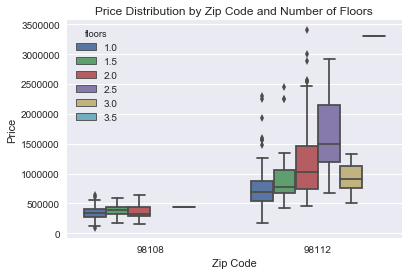

In [13]:
ax = sns.boxplot(x='zipcode', y='price', hue='floors', data=df[df['zipcode'].isin([98112, 98108])])
ax.set(xlabel='Zip Code', ylabel='Price')
plt.title('Price Distribution by Zip Code and Number of Floors')

plt.show()

It looks like 2.5 is the sweet spot for number of floors. I'm guessing that's because these are new construction with a tuck-under garage. Very in right now.

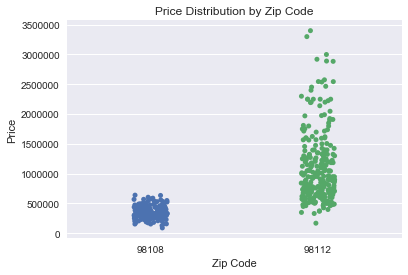

In [14]:
ax = sns.stripplot(x='zipcode', y='price', data=df[df['zipcode'].isin([98112, 98108])], jitter=True)
ax.set(xlabel='Zip Code', ylabel='Price')
plt.title('Price Distribution by Zip Code')

plt.show()

Not a very useful plot -- not nearly as descriptive as the box plot.

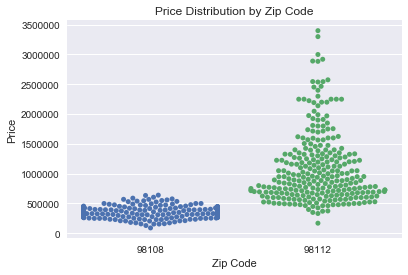

In [15]:
ax = sns.swarmplot(x='zipcode', y='price', data=df[df['zipcode'].isin([98112, 98108])])
ax.set(xlabel='Zip Code', ylabel='Price')
plt.title('Price Distribution by Zip Code')

plt.show()

Again, not very useful, but maybe a little better than the stripplot above. You can see that the distributions have different shapes in addition to 98112 being more expensive overall.

Let's add another couple of Zip Codes for fun.

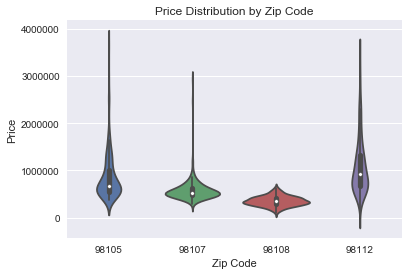

In [16]:
ax = sns.violinplot(x='zipcode', y='price', data=df[df['zipcode'].isin([98112, 98108, 98105, 98107])])
ax.set(xlabel='Zip Code', ylabel='Price')
plt.title('Price Distribution by Zip Code')

plt.show()

This one is pretty cool -- I think it's more descriptive than the box plot, however, it may lose that advantage by the fact that it's less common and people aren't as used to reading it. 

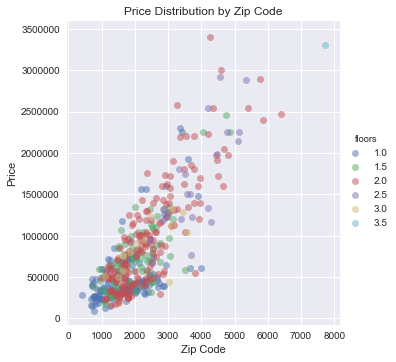

In [17]:
ax = sns.lmplot(x="sqft_living", y="price", hue="floors", data=df[df['zipcode'].isin([98112, 98108])], fit_reg=False, scatter_kws={'alpha':0.5})
ax.set(xlabel='Zip Code', ylabel='Price')
plt.title('Price Distribution by Zip Code')

plt.show()

This plot would work a lot better if there weren't so many data points, or if there were only two categories (instead of six choices for floors). Otherwise, it's a cool idea, and may give some insight if those conditions were met.

## Challenge: One Plot To Rule Them All

"Find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships."

This dataset should work well for this. Let's use Price, Sq Ft, # Bedrooms, and # Bathrooms as the continuous variables (#BR and #Bath aren't strictly continuous, but I think there is enough variation to make them work), and Zip Code as the categorical data.

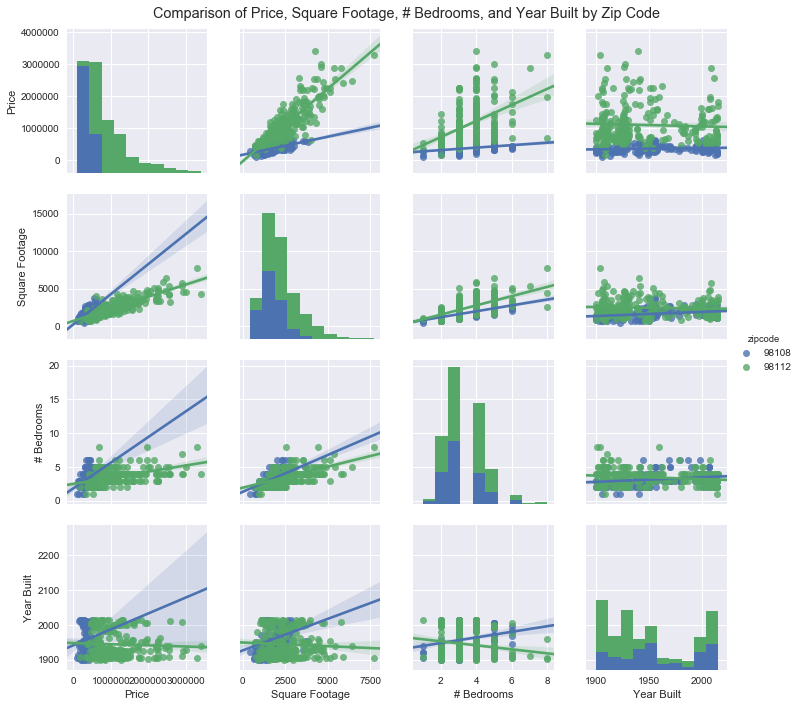

In [20]:
ax = sns.pairplot(
        data=df[df['zipcode'].isin([98112, 98108])], 
        vars=['price', 'sqft_living', 'bedrooms', 'yr_built'],
        hue='zipcode',
        kind='reg'
        )

new_labels = {'price': 'Price', 'sqft_living': 'Square Footage',
                'bedrooms': '# Bedrooms', 'yr_built': 'Year Built'}

for i in range(4):
    for j in range(4):
        xlabel = ax.axes[i][j].get_xlabel()
        ylabel = ax.axes[i][j].get_ylabel()
        if xlabel in new_labels.keys():
            ax.axes[i][j].set_xlabel(new_labels[xlabel])
        if ylabel in new_labels.keys():
            ax.axes[i][j].set_ylabel(new_labels[ylabel])

plt.subplots_adjust(top=0.95)
ax.fig.suptitle('Comparison of Price, Square Footage, # Bedrooms, and Year Built by Zip Code')
plt.show()
              

There's a lot of information here. Along the diagonal I've plotted the distribution of each variable separately by Zip Code. Each other plot is a comparison of two variables, so the plots in the top right triangle are the same as in the lower left, but with axes flipped. 

In terms of the actual data, there does appear to be a relationship between Price, Sqft and #BR, but not Year Built. This makes sense, as SqFt and #Bed are interrelated: bigger houses have more bedrooms. They also has a positive correlation with Price, and it would be interesting to build a model to see which variables and which combinations of variables have the greatest effect on price. From the Year Built distribution, there seems to be relatively few homes from the 60's-80's. This may be because they're being torn down and replaced with modern homes, or because not as many were built in the first place.

Perhaps the most interesting bit here is the difference between Zip Codes in the "Sq Ft vs Price" plot (top row, 2nd column). In 98108, a bigger house will cost you more than a small one, but not nearly as much more as it would in 98112. If you're really looking for a big house, you'll save a lot of money by moving south of the city center to 98108.


(Note: I can't figure out how to change markersize without removing kind='reg'!)